In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family']= 'NanumGothic'
plt.rcParams['axes.unicode_minus']=False


In [ ]:



# 저장한 파일 목록
saved_files = []

# 시도코드가 숫자인 행만 대상으로 처리
valid_codes = df['행정구역시도코드'].dropna().astype(str)
valid_codes = valid_codes[valid_codes.str.isnumeric()].unique()

# 파일로 저장
for region_code in valid_codes:
    region_df = df[df['행정구역시도코드'].astype(str) == region_code]
    file_name = f"{region_code}.csv"
    region_df.to_csv(file_name, index=False, encoding='cp949')
    saved_files.append(file_name)

print(saved_files)



In [ ]:
df= pd.read_csv('11.csv', encoding='cp949')
df

,가구일련번호,행정구역시도코드,행정구역시도코드_LABEL,행정구역시군구코드,동읍면부_구분코드,동읍면부구분코드_LABEL,조사구특성코드,조사구특성_LABEL,가구원번호,성별코드,...,생활비 원천-부동산 등 실물 자산(매도 및 임대 수입 등)_LABEL,고령자생활비원천_동거자녀_생활비마련여부,생활비 원천-자녀의 도움_LABEL,고령자생활비원천_부모_생활비마련여부,생활비 원천-부모의 도움_LABEL,고령자생활비원천_국가지자체보조_생활비마련여부,생활비 원천-국가 및 지방자치단체의 보조(기초연금 등)_LABEL,고령자생활비원천_기타_생활비마련여부,생활비 원천-기타_LABEL,인구가중값
0,1103016614,11,서울특별시,30,3,동부,1,일반조사구,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50
1,1117004563,11,서울특별시,170,3,동부,A,아파트조사구,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
2,1105002245,11,서울특별시,50,3,동부,1,일반조사구,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68
3,1119032846,11,서울특별시,190,3,동부,A,아파트조사구,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60
4,1107016270,11,서울특별시,70,3,동부,1,일반조사구,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18561,1108012164,11,서울특별시,80,3,동부,1,일반조사구,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65
18562,1123038893,11,서울특별시,230,3,동부,1,일반조사구,3,1,...,NaN,NaN,NaN,1.0,부모의 도움,NaN,NaN,NaN,NaN,46
18563,1111022633,11,서울특별시,110,3,동부,A,아파트조사구,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87
18564,1101002745,11,서울특별시,10,3,동부,A,아파트조사구,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29


In [ ]:
import pandas as pd

# 예시: 데이터프레임에 '만연령' 컬럼이 있다고 가정
# df = pd.read_csv("제주도.txt", delimiter="\t")  # 정제 완료된 경우

# 연령대 분류 함수 정의
def categorize_age(age):
    if age < 20:
        return '10대'
    elif age < 30:
        return '20대'
    elif age < 40:
        return '30대'
    elif age < 50:
        return '40대'
    elif age < 60:
        return '50대'
    elif age < 70:
        return '60대'
    else:
        return '70대 이상'

# 연령대 컬럼 추가
df['연령대'] = df['만연령'].apply(categorize_age)

# 확인
print(df[['만연령', '연령대']].head())


   만연령  연령대
0   44  40대
1   30  30대
2   53  50대
3   64  60대
4    7  10대


연령대
10대       3095
20대       5004
30대       4329
40대       2368
50대       1885
60대       1150
70대 이상     735
Name: count, dtype: int64


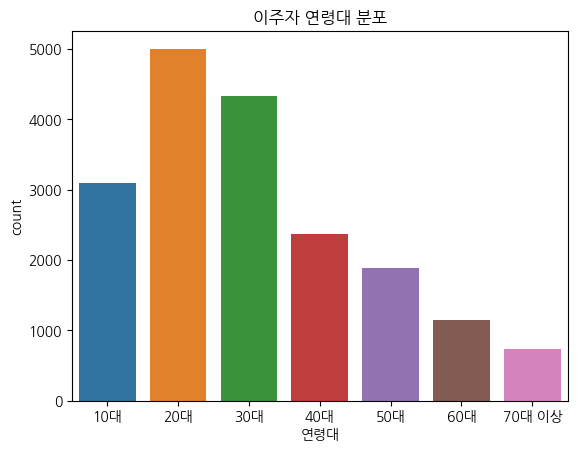

In [ ]:
# 연령대별 인원 수 확인
print(df['연령대'].value_counts().sort_index())

# 시각화 (선택)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='연령대', order=['10대', '20대', '30대', '40대', '50대', '60대', '70대 이상'])
plt.title("이주자 연령대 분포")
plt.show()


In [ ]:
import pandas as pd


# 1. 나이 분포
print("▶ 나이 분포")
print(df['만연령'].describe())
print(df['만연령'].value_counts(bins=5).sort_index())

# 2. 성별 분포
print("\n▶ 성별 분포")
print(df['가구원성별_LABEL'].value_counts(normalize=True) * 100)

# 3. 출신 시도 분석
print("\n▶ 출신 시도 분포")
print(df['출생지 다른 시도_LABEL'].value_counts())

# 3. 출신 시도 분석
print("\n▶ 1년전거주지_다른시도")
print(df['1년전거주지_다른시도_LABEL'].value_counts())
# 3. 출신 시도 분석
print("\n▶ 5년전거주지_다른시도")
print(df['5년전거주지_다른시도_LABEL'].value_counts())



# 4. 직업 분포
print("\n▶ 종사자 분포")
print(df['종사상지위_LABEL'].value_counts())


# 4. 직업 분포
print("\n▶ 산업대분류 분포")
print(df['산업대분류_LABEL'].value_counts())



# 5. 혼인 여부
print("\n▶ 혼인 여부 분포")
print(df['혼인상태_LABEL'].value_counts(normalize=True) * 100)

# 6. 가구 구성 유형
print("\n▶ 가구 구성")
print(df['가구주와의 관계_LABEL'].value_counts())



# 6. 가구 구성 유형
print("\n▶ 교육정도")
print(df['교육정도_LABEL'].value_counts())



▶ 나이 분포
count    18566.000000
mean        34.143919
std         18.285578
min          0.000000
25%         24.000000
50%         32.000000
75%         45.000000
max         85.000000
Name: 만연령, dtype: float64
만연령
(-0.08600000000000001, 17.0]    2727
(17.0, 34.0]                    7852
(34.0, 51.0]                    4663
(51.0, 68.0]                    2541
(68.0, 85.0]                     783
Name: count, dtype: int64

▶ 성별 분포
가구원성별_LABEL
여자    51.869008
남자    48.130992
Name: proportion, dtype: float64

▶ 출신 시도 분포
출생지 다른 시도_LABEL
서울특별시      2016
경기도        1816
전라남도        948
전라북도        823
부산광역시       767
경상북도        749
경상남도        654
충청남도        624
강원도         584
대구광역시       515
인천광역시       461
충청북도        426
광주광역시       408
대전광역시       286
울산광역시       196
제주특별자치도     126
세종특별자치시      14
Name: count, dtype: int64

▶ 1년전거주지_다른시도
1년전거주지_다른시도_LABEL
서울특별시      6821
경기도        2665
인천광역시       403
강원도         253
부산광역시       226
충청남도        214
경상북도        167
경상남도        155
대구

In [ ]:
# 수도권 지역 리스트
capital_area = ['서울특별시', '경기도', '인천광역시']

# 분류 함수 정의
def categorize_region(region):
    if pd.isna(region):
        return '기타'
    elif region in capital_area:
        return '수도권'
    else:
        return '비수도권'

# 적용
df['5년전거주지_지역권역'] = df['5년전거주지_다른시도_LABEL'].apply(categorize_region)

# 확인
print(df['5년전거주지_지역권역'].value_counts())


5년전거주지_지역권역
수도권     9372
기타      6250
비수도권    2944
Name: count, dtype: int64


In [ ]:
# 수도권 지역 리스트
capital_area = ['서울특별시', '경기도', '인천광역시']

# 분류 함수 정의
def categorize_region(region):
    if pd.isna(region):
        return '기타'
    elif region in capital_area:
        return '수도권'
    else:
        return '비수도권'

# 적용
df['1년전거주지_지역권역'] = df['1년전거주지_다른시도_LABEL'].apply(categorize_region)

# 확인
print(df['1년전거주지_지역권역'].value_counts())


1년전거주지_지역권역
수도권     9889
기타      6609
비수도권    2068
Name: count, dtype: int64


In [ ]:
아동보육_**_돌봄주체여부 체크된 거 카운트

In [ ]:
# 6. 가구 구성 유형
print("\n▶ 통근통학_소요분수")
print(df['통근통학_소요분수'].value_counts())



▶ 통근통학_소요분수
통근통학_소요분수
0      6788
30     2439
60     1470
40     1399
20     1372
       ... 
125       1
57        1
88        1
34        1
69        1
Name: count, Length: 71, dtype: int64


In [ ]:
# 6. 가구 구성 유형
print("\n▶ 경제활동상태")
print(df['경제활동상태_LABEL'].value_counts())



▶ 경제활동상태
경제활동상태_LABEL
주로 일하였음     9518
일하지 않았음     5277
틈틈이 일하였음     948
일시휴직         412
Name: count, dtype: int64


In [ ]:


# 6. 가구 구성 유형
print("\n▶ 산업대분류_LABEL")
print(df['산업대분류_LABEL'].value_counts())



▶ 산업대분류_LABEL
산업대분류_LABEL
경제활동을 하지 않는 사람(결측값)                  7688
도매 및 소매업                             1763
전문, 과학 및 기술 서비스업                     1074
숙박 및 음식점업                             953
정보통신업                                 939
제조업                                   904
보건업 및 사회복지 서비스업                       869
교육 서비스업                               767
금융 및 보험업                              706
공공행정, 국방 및 사회보장 행정                    519
건설업                                   507
사업시설 관리, 사업 지원 및 임대 서비스업              479
협회 및 단체, 수리 및 기타 개인 서비스업              429
운수 및 창고업                              385
부동산업                                  253
예술, 스포츠 및 여가관련 서비스업                   235
전기,가스,증기 및 공기 조절 공급업                   31
수도, 하수 및 폐기물 처리, 원료 재생업                29
가구 내 고용활동 및 달리 분류되지 않은 자가 소비 생산활동      16
농업, 임업 및 어업                            11
국제 및 외국기관                               8
광업                                      1
Name: count, dtype: int64


In [ ]:
print("\n▶ 직업대분류")
print(df['직업대분류_LABEL'].value_counts())


▶ 직업대분류
직업대분류_LABEL
전문가 및 관련 종사자        3478
사무 종사자              3160
서비스 종사자             1278
판매 종사자              1257
단순노무 종사자             651
기능원 및 관련 기능 종사자      574
장치기계 조작 및 조립 종사자     354
관리자                   79
기타                    36
농림어업 숙련 종사자           11
Name: count, dtype: int64


In [ ]:
print("\n▶ 근로장소분류")
print(df['근로장소_LABEL'].value_counts())


▶ 근로장소분류
근로장소_LABEL
사업장         10214
야외 작업 현장      325
운송 수단         137
자기 집           89
남의 집           88
기타             13
거리             12
Name: count, dtype: int64


In [ ]:
print("\n▶ 현직업근무연수_LABEL")
print(df['현직업근무연수_LABEL'].value_counts())



▶ 현직업근무연수_LABEL
현직업근무연수_LABEL
1년~3년 미만        2223
5년~10년 미만       2059
3년~5년 미만        1489
10년~15년 미만      1234
6개월 이상~1년 미만    1221
6개월 미만          1215
20년 이상           854
15년~20년 미만       583
Name: count, dtype: int64


In [ ]:
print("\n▶ 혼인여부")
print(df['혼인상태_LABEL'].value_counts())



▶ 혼인여부
혼인상태_LABEL
미혼        8176
배우자 있음    6605
이혼         861
사별         513
Name: count, dtype: int64


In [ ]:
df= pd.read_csv('11.csv', encoding='cp949')
df

,가구일련번호,행정구역시도코드,행정구역시도코드_LABEL,행정구역시군구코드,동읍면부_구분코드,동읍면부구분코드_LABEL,조사구특성코드,조사구특성_LABEL,가구원번호,성별코드,...,생활비 원천-부동산 등 실물 자산(매도 및 임대 수입 등)_LABEL,고령자생활비원천_동거자녀_생활비마련여부,생활비 원천-자녀의 도움_LABEL,고령자생활비원천_부모_생활비마련여부,생활비 원천-부모의 도움_LABEL,고령자생활비원천_국가지자체보조_생활비마련여부,생활비 원천-국가 및 지방자치단체의 보조(기초연금 등)_LABEL,고령자생활비원천_기타_생활비마련여부,생활비 원천-기타_LABEL,인구가중값
0,1103016614,11,서울특별시,30,3,동부,1,일반조사구,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50
1,1117004563,11,서울특별시,170,3,동부,A,아파트조사구,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
2,1105002245,11,서울특별시,50,3,동부,1,일반조사구,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68
3,1119032846,11,서울특별시,190,3,동부,A,아파트조사구,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60
4,1107016270,11,서울특별시,70,3,동부,1,일반조사구,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18561,1108012164,11,서울특별시,80,3,동부,1,일반조사구,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65
18562,1123038893,11,서울특별시,230,3,동부,1,일반조사구,3,1,...,NaN,NaN,NaN,1.0,부모의 도움,NaN,NaN,NaN,NaN,46
18563,1111022633,11,서울특별시,110,3,동부,A,아파트조사구,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87
18564,1101002745,11,서울특별시,10,3,동부,A,아파트조사구,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29


In [ ]:
capital_area = ['서울특별시', '경기도', '인천광역시']

def classify_origin(x):
    if pd.isna(x):
        return '기타'
    elif x in capital_area:
        return '수도권'
    else:
        return '비수도권'

df['출생지역권역'] = df['출생지 다른 시도_LABEL'].apply(classify_origin)


In [ ]:
def age_group(age):
    if pd.isna(age): return '정보 없음'
    age = int(age)
    if age < 20: return '10대'
    elif age < 30: return '20대'
    elif age < 40: return '30대'
    elif age < 50: return '40대'
    elif age < 60: return '50대'
    elif age < 70: return '60대'
    else: return '70대 이상'

df['연령대'] = df['만연령'].apply(age_group)


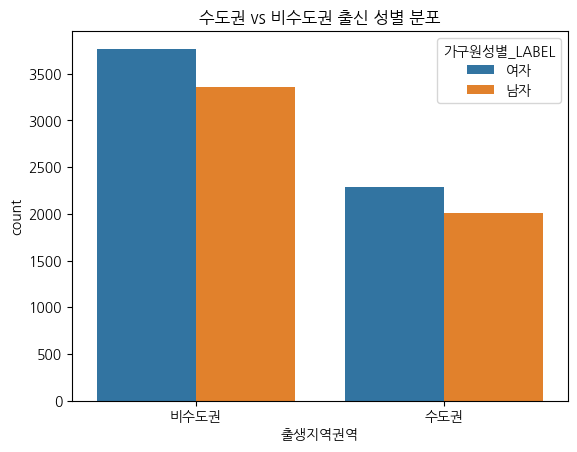

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df[df['출생지역권역'] != '기타'],
              x='출생지역권역',
              hue='가구원성별_LABEL')
plt.title("수도권 vs 비수도권 출신 성별 분포")
plt.show()


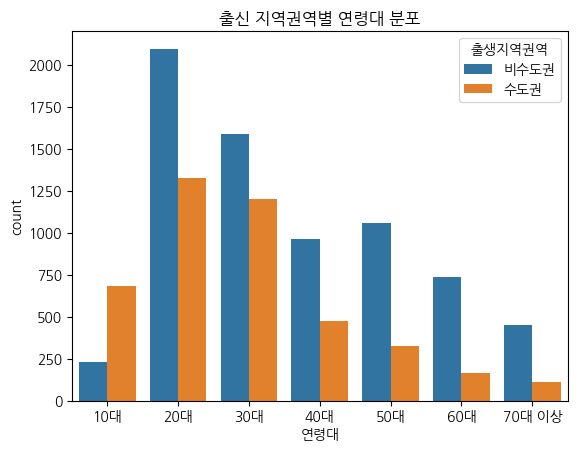

In [ ]:
sns.countplot(data=df[df['출생지역권역'] != '기타'],
              x='연령대',
              hue='출생지역권역',
              order=['10대', '20대', '30대', '40대', '50대', '60대', '70대 이상'])
plt.title("출신 지역권역별 연령대 분포")
plt.show()


In [ ]:
edu_pivot = pd.crosstab(df['교육정도_LABEL'], df['출생지역권역'], normalize='columns') * 100
print(edu_pivot.round(1))


출생지역권역          기타  비수도권   수도권
교육정도_LABEL                    
고등학교          17.5  18.6  17.8
대학교(2,3년제)    10.3  11.5  13.6
대학교(4년제 이상)   35.5  49.1  45.6
대학원 박사 과정      1.5   3.0   1.7
대학원 석사 과정      6.4   8.7   7.2
받지않았음(미취학포함)  17.7   1.2   6.0
중학교            4.2   4.1   2.8
초등학교           6.8   3.9   5.3


In [ ]:

# 수도권 분류
capital_area = ['서울특별시', '경기도', '인천광역시']
df['출생지역권역'] = df['출생지 다른 시도_LABEL'].apply(
    lambda x: '기타' if pd.isna(x) else '수도권' if x in capital_area else '비수도권'
)

# 연령대 분류
def age_group(age):
    if pd.isna(age): return '정보 없음'
    age = int(age)
    if age < 20: return '10대'
    elif age < 30: return '20대'
    elif age < 40: return '30대'
    elif age < 50: return '40대'
    elif age < 60: return '50대'
    elif age < 70: return '60대'
    else: return '70대 이상'
df['연령대'] = df['만연령'].apply(age_group)

# 연령대, 직업, 교육 수준 분포 비교
age_dist = pd.crosstab(df[df['출생지역권역'] != '기타']['연령대'],
                       df[df['출생지역권역'] != '기타']['출생지역권역'],
                       normalize='columns') * 100
job_dist = pd.crosstab(df[df['출생지역권역'] != '기타']['직업대분류_LABEL'],
                       df[df['출생지역권역'] != '기타']['출생지역권역'],
                       normalize='columns') * 100
edu_dist = pd.crosstab(df[df['출생지역권역'] != '기타']['교육정도_LABEL'],
                       df[df['출생지역권역'] != '기타']['출생지역권역'],
                       normalize='columns') * 100

# 확인
print("연령대 분포 (%)")
print(age_dist.round(1))
print("\n직업 분포 (%)")
print(job_dist.round(1))
print("\n교육 수준 분포 (%)")
print(edu_dist.round(1))


연령대 분포 (%)
출생지역권역  비수도권   수도권
연령대               
10대      3.2  16.0
20대     29.4  30.9
30대     22.3  28.0
40대     13.5  11.1
50대     14.9   7.6
60대     10.4   3.9
70대 이상   6.4   2.5

직업 분포 (%)
출생지역권역            비수도권   수도권
직업대분류_LABEL                 
관리자                0.8   0.6
기능원 및 관련 기능 종사자    5.0   5.0
기타                 0.3   0.4
농림어업 숙련 종사자        0.1   0.1
단순노무 종사자           6.5   5.1
사무 종사자            27.6  31.3
서비스 종사자           11.8  11.6
장치기계 조작 및 조립 종사자   3.3   2.9
전문가 및 관련 종사자      33.8  32.0
판매 종사자            10.8  10.9

교육 수준 분포 (%)
출생지역권역        비수도권   수도권
교육정도_LABEL              
고등학교          18.6  17.8
대학교(2,3년제)    11.5  13.6
대학교(4년제 이상)   49.1  45.6
대학원 박사 과정      3.0   1.7
대학원 석사 과정      8.7   7.2
받지않았음(미취학포함)   1.2   6.0
중학교            4.1   2.8
초등학교           3.9   5.3


In [ ]:

# 상위 직업/교육 항목 추출
top_jobs = df['직업대분류_LABEL'].value_counts().nlargest(8).index.tolist()
top_edu = df['교육정도_LABEL'].value_counts().nlargest(6).index.tolist()

# 교차표 생성
filtered_df = df[df['직업대분류_LABEL'].isin(top_jobs) & df['교육정도_LABEL'].isin(top_edu)]
cross_tab = pd.crosstab(
    filtered_df['직업대분류_LABEL'],
    filtered_df['교육정도_LABEL'],
    normalize='columns'
) * 100

# 결과 출력
print("\n직업 × 교육 수준 교차표 (상위 항목, %)")
print(cross_tab.round(1))



직업 × 교육 수준 교차표 (상위 항목, %)
교육정도_LABEL        고등학교  대학교(2,3년제)  대학교(4년제 이상)  대학원 석사 과정  받지않았음(미취학포함)  초등학교
직업대분류_LABEL                                                                   
관리자                0.4         0.5          0.8        1.4           0.0   0.0
기능원 및 관련 기능 종사자   11.4         6.1          3.5        1.2           0.0  11.5
단순노무 종사자          13.6         5.0          3.7        1.9          50.0  42.3
사무 종사자            21.5        28.2         34.2       25.6           0.0   9.6
서비스 종사자           20.5        15.8          9.4        4.8          50.0  13.5
장치기계 조작 및 조립 종사자   7.2         3.5          2.1        1.3           0.0   9.6
전문가 및 관련 종사자       7.2        26.3         36.2       57.4           0.0   0.0
판매 종사자            18.1        14.5         10.1        6.4           0.0  13.5


In [ ]:

# 직업/교육 상위 항목 필터링
top_jobs = df['직업대분류_LABEL'].value_counts().nlargest(8).index.tolist()
top_edu = df['교육정도_LABEL'].value_counts().nlargest(6).index.tolist()

# 필터링
filtered_df = df[
    df['직업대분류_LABEL'].isin(top_jobs) &
    df['교육정도_LABEL'].isin(top_edu) &
    df['출생지역권역'].isin(['수도권', '비수도권'])
]

# 교차표: 수도권
capital_df = filtered_df[filtered_df['출생지역권역'] == '수도권']
cross_capital = pd.crosstab(
    capital_df['직업대분류_LABEL'],
    capital_df['교육정도_LABEL'],
    normalize='columns'
) * 100

# 교차표: 비수도권
noncapital_df = filtered_df[filtered_df['출생지역권역'] == '비수도권']
cross_noncapital = pd.crosstab(
    noncapital_df['직업대분류_LABEL'],
    noncapital_df['교육정도_LABEL'],
    normalize='columns'
) * 100

# 출력
print("▶ 수도권 출신 이주자: 직업 × 교육 수준 교차표 (%)")
print(cross_capital.round(1))

print("\n▶ 비수도권 출신 이주자: 직업 × 교육 수준 교차표 (%)")
print(cross_noncapital.round(1))


▶ 수도권 출신 이주자: 직업 × 교육 수준 교차표 (%)
교육정도_LABEL        고등학교  대학교(2,3년제)  대학교(4년제 이상)  대학원 석사 과정  받지않았음(미취학포함)  초등학교
직업대분류_LABEL                                                                   
관리자                0.4         0.2          0.8        0.8           0.0   0.0
기능원 및 관련 기능 종사자   10.4         6.2          3.5        1.7           0.0  28.6
단순노무 종사자          10.8         4.2          4.0        1.2           0.0  57.1
사무 종사자            23.7        33.1         35.1       26.4           0.0   0.0
서비스 종사자           22.6        14.0          9.2        1.7         100.0  14.3
장치기계 조작 및 조립 종사자   6.0         3.8          2.0        0.4           0.0   0.0
전문가 및 관련 종사자      10.0        25.6         36.2       58.7           0.0   0.0
판매 종사자            16.2        12.9          9.2        9.1           0.0   0.0

▶ 비수도권 출신 이주자: 직업 × 교육 수준 교차표 (%)
교육정도_LABEL        고등학교  대학교(2,3년제)  대학교(4년제 이상)  대학원 석사 과정  받지않았음(미취학포함)  초등학교
직업대분류_LABEL                                                    

In [ ]:
import pandas as pd

# 파일 업로드

# 수도권/비수도권 구분 함수
capital_area = ['서울특별시', '경기도', '인천광역시']
def classify_region(x):
    if pd.isna(x): return '기타'
    elif x in capital_area: return '수도권'
    else: return '비수도권'

# 과거 거주지 권역 구분
df['출생지_권역'] = df['출생지 다른 시도_LABEL'].apply(classify_region)
df['1년전_권역'] = df['1년전거주지_다른시도_LABEL'].apply(classify_region)
df['5년전_권역'] = df['5년전거주지_다른시도_LABEL'].apply(classify_region)

# 연령대 구분
def age_group(age):
    if pd.isna(age): return '정보 없음'
    age = int(age)
    if age < 20: return '10대'
    elif age < 30: return '20대'
    elif age < 40: return '30대'
    elif age < 50: return '40대'
    elif age < 60: return '50대'
    elif age < 70: return '60대'
    else: return '70대 이상'
df['연령대'] = df['만연령'].apply(age_group)

# 교차표 생성
print("\n▶ 연령대 × 1년 전 거주지 권역 (%)")
print(pd.crosstab(df['연령대'], df['1년전_권역'], normalize='columns').round(2) * 100)

print("\n▶ 연령대 × 5년 전 거주지 권역 (%)")
print(pd.crosstab(df['연령대'], df['5년전_권역'], normalize='columns').round(2) * 100)

print("\n▶ 직업 × 1년 전 거주지 권역 (%)")
print(pd.crosstab(df['직업대분류_LABEL'], df['1년전_권역'], normalize='columns').round(2) * 100)

print("\n▶ 혼인상태 × 1년 전 거주지 권역 (%)")
print(pd.crosstab(df['혼인상태_LABEL'], df['1년전_권역'], normalize='columns').round(2) * 100)



▶ 연령대 × 1년 전 거주지 권역 (%)
1년전_권역    기타  비수도권   수도권
연령대                     
10대     25.0   8.0  13.0
20대     20.0  51.0  27.0
30대     19.0  20.0  27.0
40대     13.0   8.0  13.0
50대     11.0   6.0  10.0
60대      7.0   4.0   6.0
70대 이상   5.0   3.0   4.0

▶ 연령대 × 5년 전 거주지 권역 (%)
5년전_권역    기타  비수도권   수도권
연령대                     
10대     32.0   6.0  10.0
20대     17.0  57.0  24.0
30대     15.0  21.0  29.0
40대     13.0   6.0  15.0
50대     11.0   5.0  11.0
60대      7.0   3.0   7.0
70대 이상   5.0   2.0   4.0

▶ 직업 × 1년 전 거주지 권역 (%)
1년전_권역              기타  비수도권   수도권
직업대분류_LABEL                       
관리자                1.0   1.0   1.0
기능원 및 관련 기능 종사자    6.0   4.0   5.0
기타                 0.0   1.0   0.0
농림어업 숙련 종사자        0.0   0.0   0.0
단순노무 종사자           7.0   5.0   6.0
사무 종사자            28.0  29.0  29.0
서비스 종사자           13.0  13.0  11.0
장치기계 조작 및 조립 종사자   4.0   3.0   3.0
전문가 및 관련 종사자      28.0  34.0  33.0
판매 종사자            12.0  10.0  12.0

▶ 혼인상태 × 1년 전 거주지 권역 (%)
1년전_권역        기타  비수도권   수도권
혼

In [ ]:
가구 구성, 주거 형태, 경제활동 분석

SyntaxError: invalid syntax (2478183818.py, line 1)

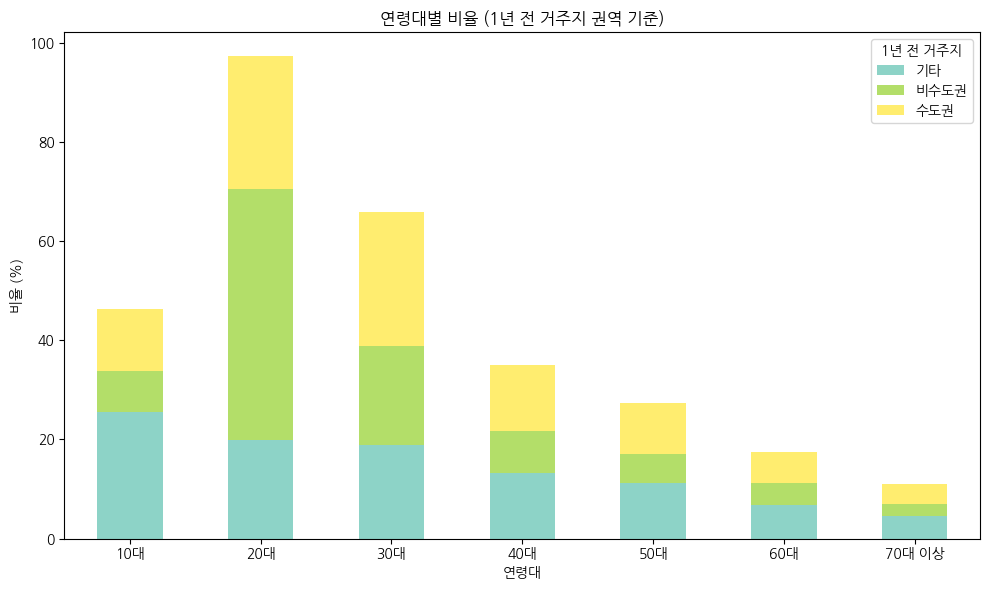

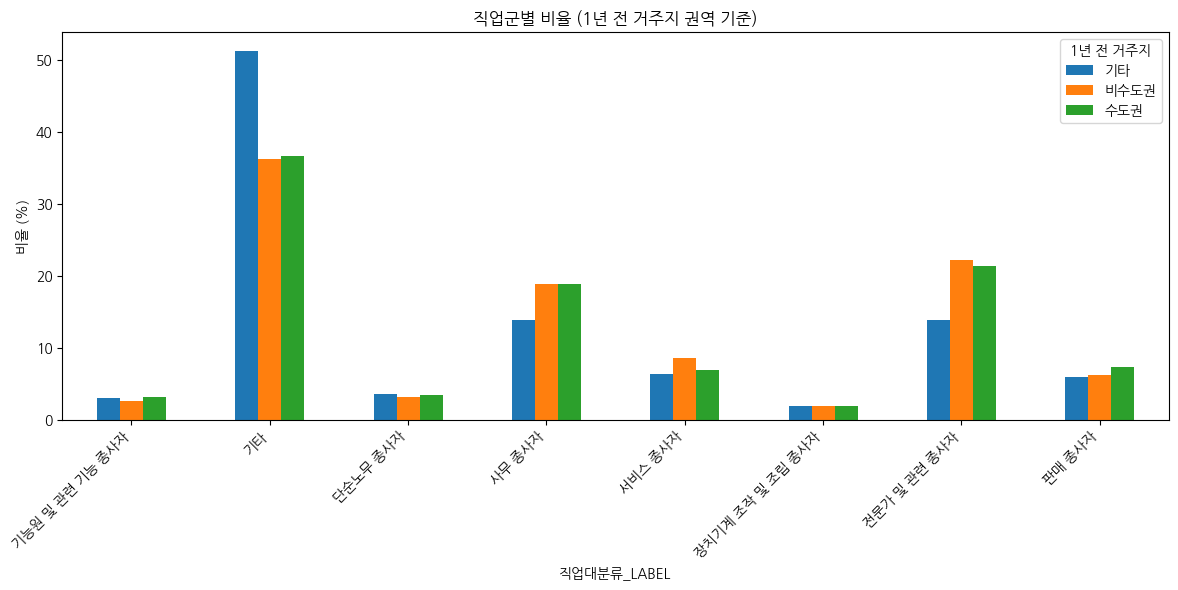

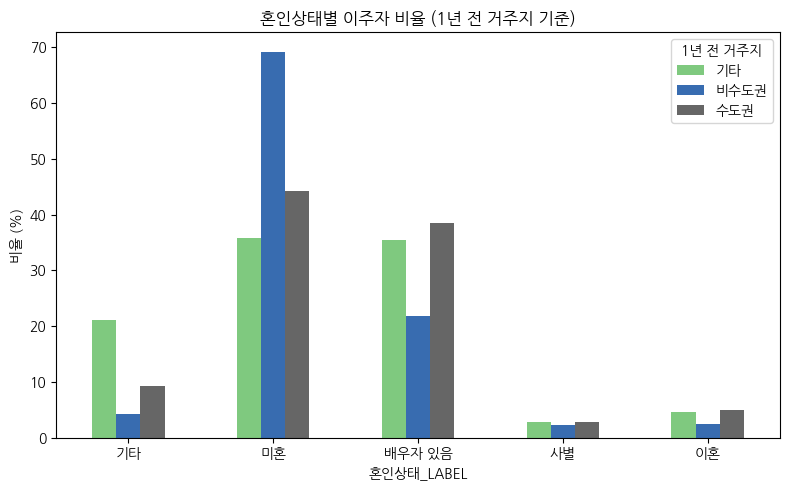

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

capital_area = ['서울특별시', '경기도', '인천광역시']
def classify_region(x):
    if pd.isna(x): return '기타'
    elif x in capital_area: return '수도권'
    else: return '비수도권'

# 연령대 함수
def age_group(age):
    if pd.isna(age): return '정보 없음'
    age = int(age)
    if age < 20: return '10대'
    elif age < 30: return '20대'
    elif age < 40: return '30대'
    elif age < 50: return '40대'
    elif age < 60: return '50대'
    elif age < 70: return '60대'
    else: return '70대 이상'

# 전처리
df['연령대'] = df['만연령'].apply(age_group)
df['1년전_권역'] = df['1년전거주지_다른시도_LABEL'].apply(classify_region)
df['직업대분류_LABEL'] = df['직업대분류_LABEL'].fillna('기타')
df['혼인상태_LABEL'] = df['혼인상태_LABEL'].fillna('기타')

# ===== 연령대 × 1년 전 거주지 =====
age_dist = pd.crosstab(df['연령대'], df['1년전_권역'], normalize='columns') * 100
age_dist = age_dist.loc[['10대', '20대', '30대', '40대', '50대', '60대', '70대 이상']]
age_dist.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set3')
plt.title("연령대별 비율 (1년 전 거주지 권역 기준)")
plt.ylabel("비율 (%)")
plt.xticks(rotation=0)
plt.legend(title="1년 전 거주지")
plt.tight_layout()
plt.show()

# ===== 직업 × 1년 전 거주지 =====
top_jobs = df['직업대분류_LABEL'].value_counts().nlargest(8).index
job_df = df[df['직업대분류_LABEL'].isin(top_jobs)]
job_dist = pd.crosstab(job_df['직업대분류_LABEL'], job_df['1년전_권역'], normalize='columns') * 100
job_dist.plot(kind='bar', figsize=(12,6))
plt.title("직업군별 비율 (1년 전 거주지 권역 기준)")
plt.ylabel("비율 (%)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="1년 전 거주지")
plt.tight_layout()
plt.show()

# ===== 혼인 상태 × 1년 전 거주지 =====
marry_dist = pd.crosstab(df['혼인상태_LABEL'], df['1년전_권역'], normalize='columns') * 100
marry_dist.plot(kind='bar', figsize=(8,5), colormap='Accent')
plt.title("혼인상태별 이주자 비율 (1년 전 거주지 기준)")
plt.ylabel("비율 (%)")
plt.xticks(rotation=0)
plt.legend(title="1년 전 거주지")
plt.tight_layout()
plt.show()


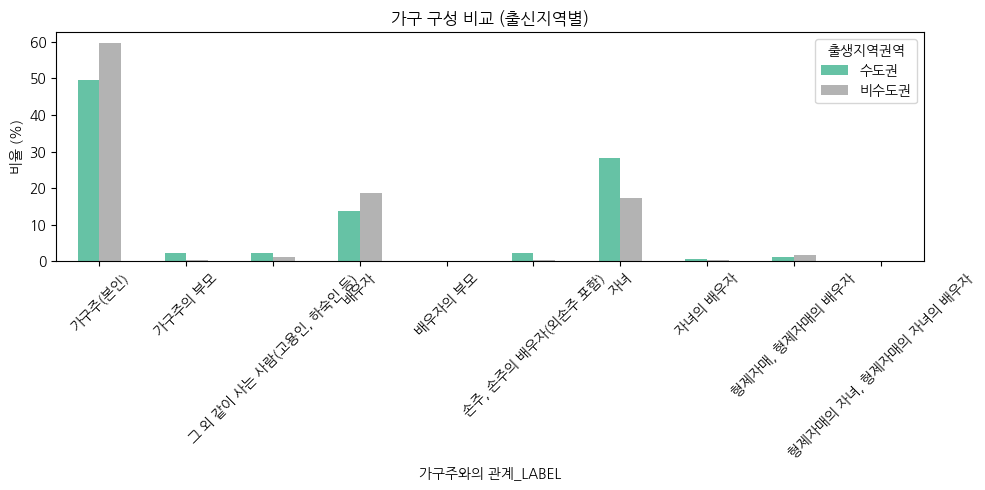

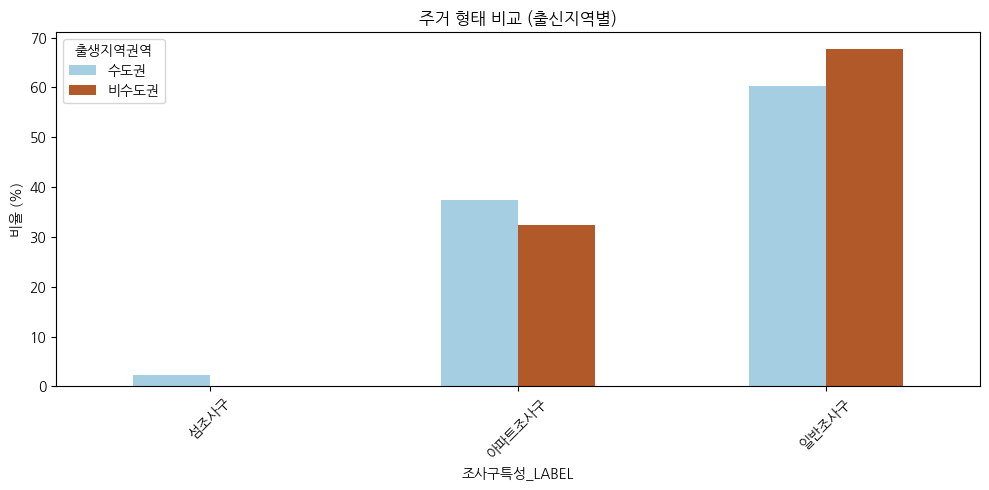

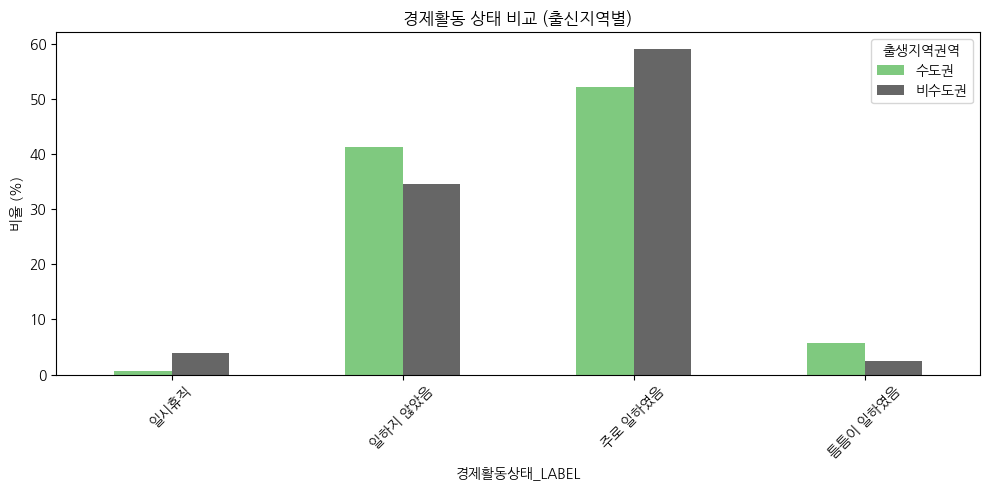

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 수도권/비수도권 분류 함수
capital_area = ['서울특별시', '경기도', '인천광역시']
def classify_region(x):
    if pd.isna(x): return '기타'
    elif x in capital_area: return '수도권'
    else: return '비수도권'

df['출생지역권역'] = df['출생지 다른 시도_LABEL'].apply(classify_region)

# === 가구 구성 (가구주와의 관계)
gagu = pd.crosstab(df['가구주와의 관계_LABEL'], df['출생지역권역'], normalize='columns') * 100
gagu = gagu[['수도권', '비수도권']]
gagu.plot(kind='bar', figsize=(10,5), colormap='Set2')
plt.title("가구 구성 비교 (출신지역별)")
plt.ylabel("비율 (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === 주거 형태 (조사구특성)
juga = pd.crosstab(df['조사구특성_LABEL'], df['출생지역권역'], normalize='columns') * 100
juga = juga[['수도권', '비수도권']]
juga.plot(kind='bar', figsize=(10,5), colormap='Paired')
plt.title("주거 형태 비교 (출신지역별)")
plt.ylabel("비율 (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === 경제활동 상태
eco = pd.crosstab(df['경제활동상태_LABEL'], df['출생지역권역'], normalize='columns') * 100
eco = eco[['수도권', '비수도권']]
eco.plot(kind='bar', figsize=(10,5), colormap='Accent')
plt.title("경제활동 상태 비교 (출신지역별)")
plt.ylabel("비율 (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
“비수도권 청년 이주자들은 실제로 취업했을까?”
“고령층 이주자는 경제활동을 유지하고 있을까, 은퇴했을까?”
“수도권 출신은 안정적인 취업 후 이주했을까?”

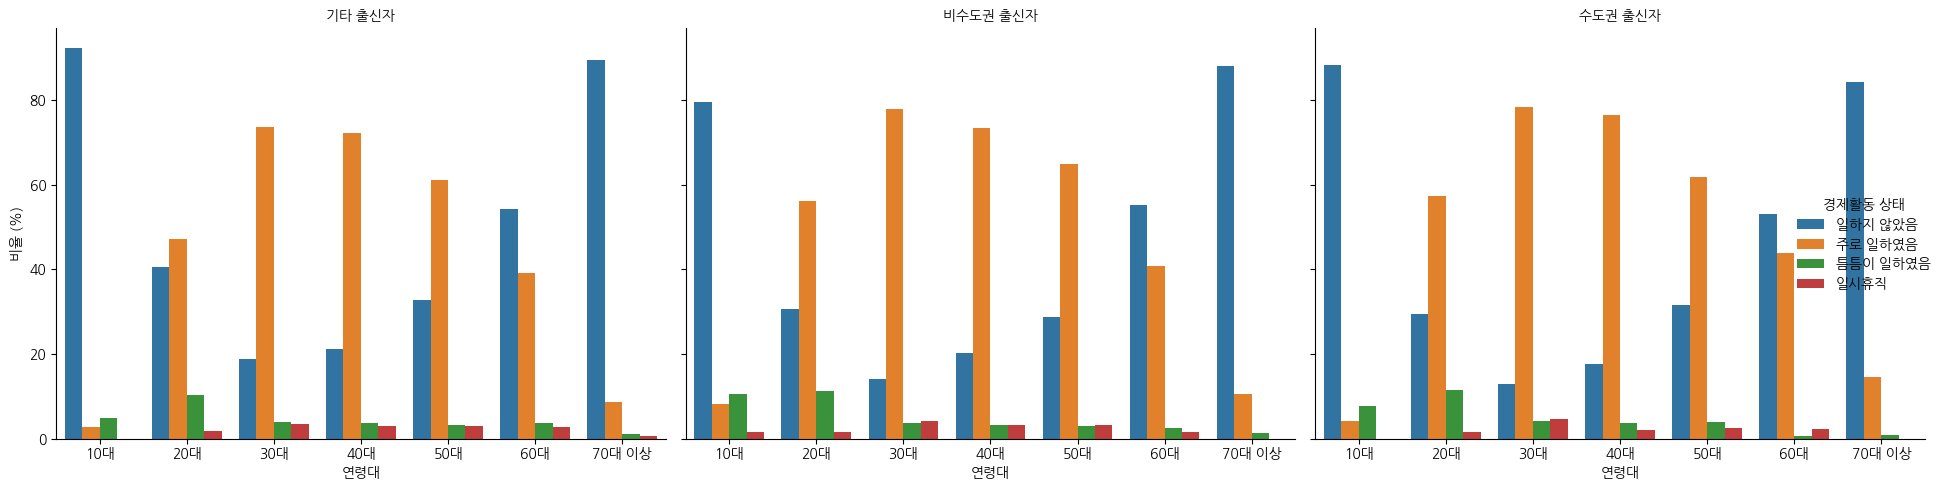

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 피벗: 연령대 × 경제활동상태 × 출신지역권역
pivot_data = df.pivot_table(index='연령대', columns='경제활동상태_LABEL',
                            values='출생지역권역', aggfunc='count')
pivot_data = pivot_data.fillna(0)

# 수도권/비수도권로 그룹화된 비율 계산
grouped = df.groupby(['출생지역권역', '연령대', '경제활동상태_LABEL']).size().reset_index(name='count')
grouped_total = grouped.groupby(['출생지역권역', '연령대'])['count'].transform('sum')
grouped['percent'] = grouped['count'] / grouped_total * 100

# 시각화
import seaborn as sns
g = sns.catplot(data=grouped, x='연령대', y='percent', hue='경제활동상태_LABEL',
                col='출생지역권역', kind='bar', height=5, aspect=1.2)
g.set_axis_labels("연령대", "비율 (%)")
g.set_titles("{col_name} 출신자")
g._legend.set_title("경제활동 상태")
plt.tight_layout()
plt.show()


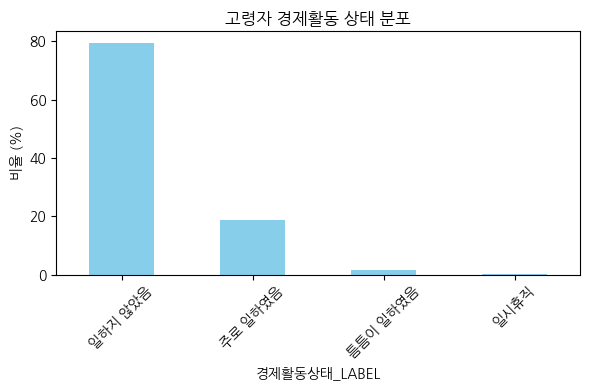

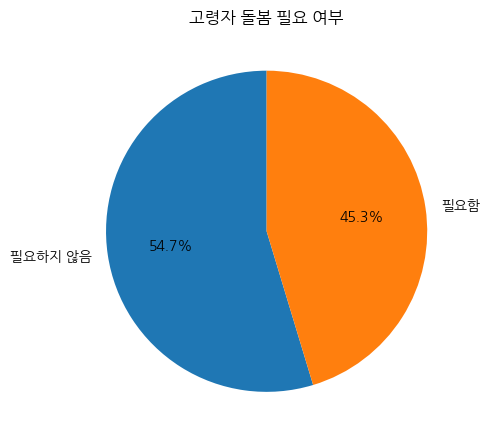

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 1. 고령자 필터링
elder = df[df['만연령'] >= 65].copy()

# ✅ 2. 생활비 원천 분석
source_cols = [col for col in df.columns if col.startswith("고령자생활비원천_") and col.endswith("LABEL")]
source_summary = elder[source_cols].apply(lambda x: x.value_counts(normalize=True) * 100).T

# ✅ 3. 경제활동 상태 분포
eco_summary = elder['경제활동상태_LABEL'].value_counts(normalize=True) * 100

# ✅ 4. 활동제약 여부 및 돌봄 필요
disability_cols = [col for col in df.columns if "활동제약-" in col]
disability_summary = elder[disability_cols].apply(lambda x: x.value_counts(normalize=True) * 100).T
care_need = elder['활동제약 돌봄 필요 여부_LABEL'].value_counts(normalize=True) * 100

# ✅ 5. 사회활동 참여 여부
social_cols = [col for col in df.columns if col.startswith("사회활동_") and col.endswith("LABEL")]
social_summary = elder[social_cols].apply(lambda x: x.value_counts(normalize=True) * 100).T



# ✅ 7. 시각화 예시 - 경제활동 상태
eco_summary.plot(kind='bar', figsize=(6, 4), color='skyblue')
plt.title("고령자 경제활동 상태 분포")
plt.ylabel("비율 (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ✅ 8. 시각화 예시 - 돌봄 필요 여부
care_need.plot(kind='pie', autopct='%1.1f%%', figsize=(5,5), startangle=90)
plt.title("고령자 돌봄 필요 여부")
plt.ylabel("")
plt.tight_layout()
plt.show()


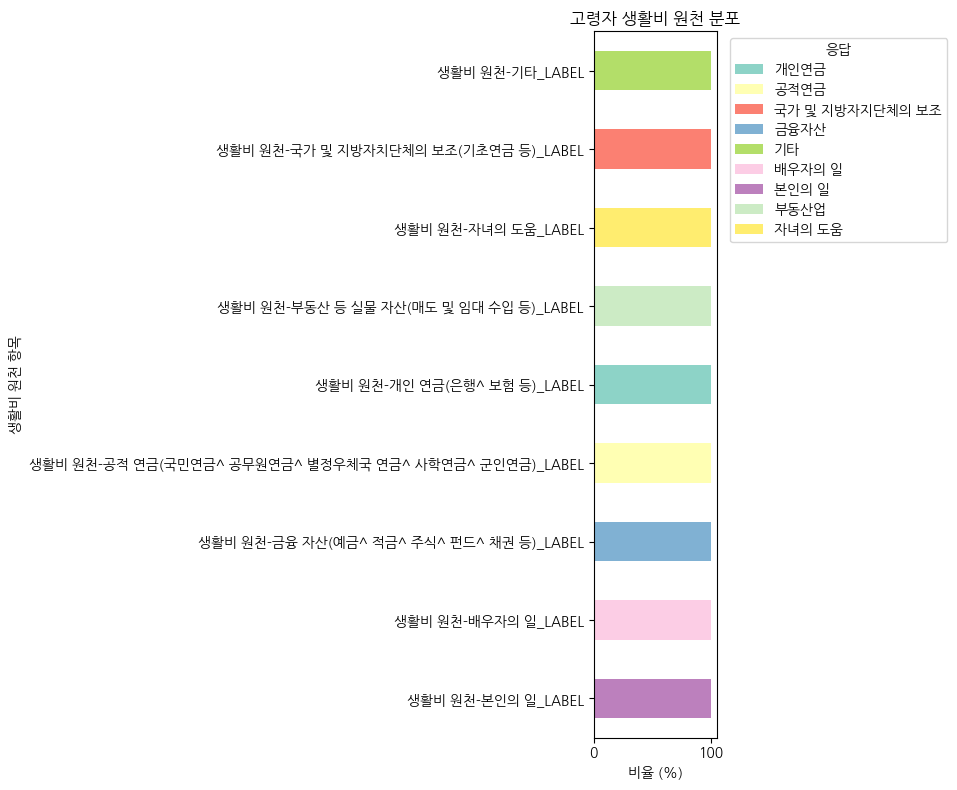

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# 고령자 필터링
elder = df[df['만연령'] >= 65].copy()

# 직접 지정한 생활비 원천 관련 LABEL 컬럼
source_cols = [
    '생활비 원천-본인의 일_LABEL',
    '생활비 원천-배우자의 일_LABEL',
    '생활비 원천-금융 자산(예금^ 적금^ 주식^ 펀드^ 채권 등)_LABEL',
    '생활비 원천-공적 연금(국민연금^ 공무원연금^ 별정우체국 연금^ 사학연금^ 군인연금)_LABEL',
    '생활비 원천-개인 연금(은행^ 보험 등)_LABEL',
    '생활비 원천-부동산 등 실물 자산(매도 및 임대 수입 등)_LABEL',
    '생활비 원천-자녀의 도움_LABEL',
    '생활비 원천-부모의 도움_LABEL',
    '생활비 원천-국가 및 지방자치단체의 보조(기초연금 등)_LABEL',
    '생활비 원천-기타_LABEL'
]

# 유효 컬럼만 필터
valid_cols = [col for col in source_cols if col in elder.columns and elder[col].notna().sum() > 0]

# 분포 요약
source_summary = elder[valid_cols].apply(lambda x: x.value_counts(normalize=True) * 100).T
source_summary = source_summary.fillna(0)

# 시각화
source_summary.plot(kind='barh', stacked=True, figsize=(10, 8), colormap='Set3')
plt.title("고령자 생활비 원천 분포")
plt.xlabel("비율 (%)")
plt.ylabel("생활비 원천 항목")
plt.legend(title="응답", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


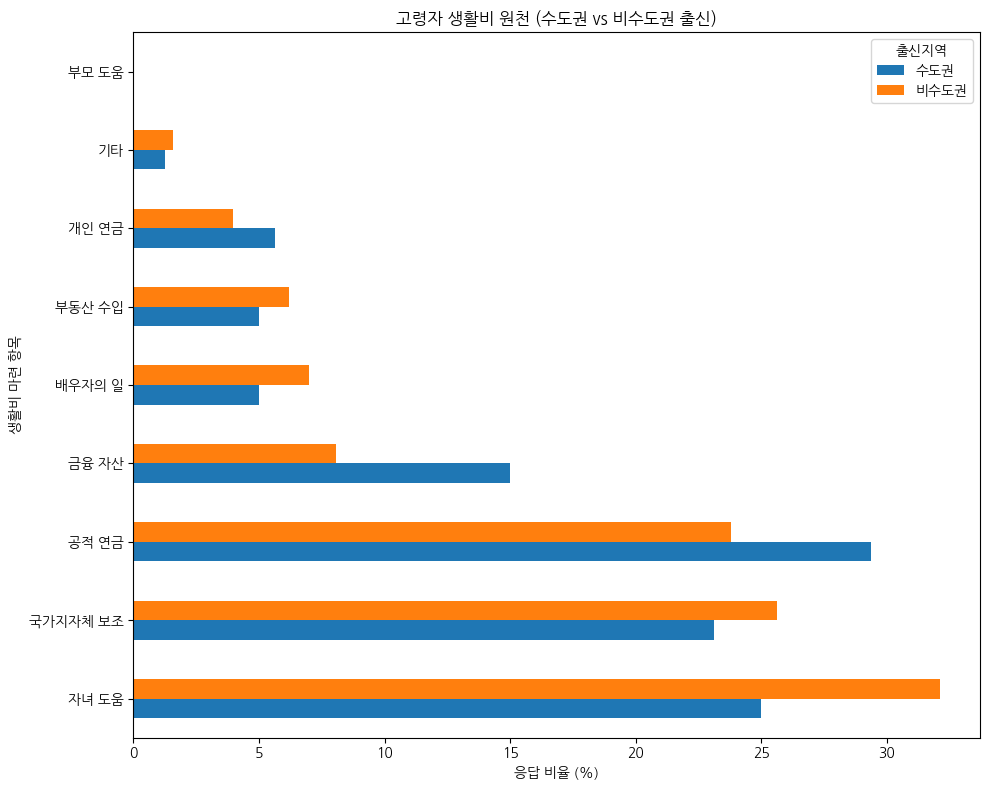

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# 수도권/비수도권 분류
capital_area = ['서울특별시', '경기도', '인천광역시']
def classify_region(x):
    if pd.isna(x): return '기타'
    elif x in capital_area: return '수도권'
    else: return '비수도권'
df['출신지역권역'] = df['출생지 다른 시도_LABEL'].apply(classify_region)

# 고령자만 필터링
elder = df[df['만연령'] >= 65].copy()
elder = elder[elder['출신지역권역'].isin(['수도권', '비수도권'])]

# ✅ 분석할 여부 컬럼들 (정수 1로 되어 있음)
source_cols = {
    '고령자생활비원천_배우자직업_생활비마련여부': '배우자의 일',
    '고령자생활비원천_예금적금_생활비마련여부': '금융 자산',
    '고령자생활비원천_공적연금_생활비마련여부': '공적 연금',
    '고령자생활비원천_개인연금_생활비마련여부': '개인 연금',
    '고령자생활비원천_부동산_생활비마련여부': '부동산 수입',
    '고령자생활비원천_동거자녀_생활비마련여부': '자녀 도움',
    '고령자생활비원천_부모_생활비마련여부': '부모 도움',
    '고령자생활비원천_국가지자체보조_생활비마련여부': '국가지자체 보조',
    '고령자생활비원천_기타_생활비마련여부': '기타'
}

# ✅ 비율 계산 (1의 비율만 집계)
summary = pd.DataFrame()
for region in ['수도권', '비수도권']:
    sub = elder[elder['출신지역권역'] == region]
    for col, label in source_cols.items():
        if col in sub.columns:
            percent = (sub[col] == 1).sum() / len(sub) * 100
            summary.loc[label, region] = percent

# ✅ 정렬 및 시각화
summary = summary.fillna(0).sort_values("비수도권", ascending=False)
summary.plot(kind='barh', figsize=(10, 8), color=["#1f77b4", "#ff7f0e"])
plt.title("고령자 생활비 원천 (수도권 vs 비수도권 출신)")
plt.xlabel("응답 비율 (%)")
plt.ylabel("생활비 마련 항목")
plt.legend(title="출신지역")
plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

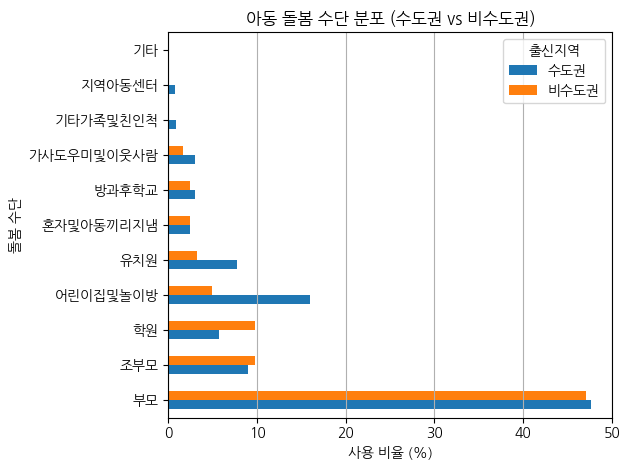

In [ ]:

# 1. 수도권/비수도권 구분
capital_area = ['서울특별시', '경기도', '인천광역시']
df['출신지역권역'] = df['출생지 다른 시도_LABEL'].apply(
    lambda x: '수도권' if x in capital_area else ('비수도권' if pd.notna(x) else '기타'))

# 2. 아동 추출 (가구주와의 관계: 자녀 + 만 18세 미만으로 가정)
df['is_child'] = df.apply(lambda row: (row['가구주와의 관계_LABEL'] == '자녀') and (row['만연령'] < 18), axis=1)
child_df = df[df['is_child'] == True].copy()
child_df = child_df[child_df['출신지역권역'].isin(['수도권', '비수도권'])]

# 3. 아동보육 관련 컬럼만 추출
care_cols = [col for col in df.columns if col.startswith("아동보육_") and col.endswith("_돌봄주체여부")]
care_label_cols = [col for col in df.columns if col.endswith("_LABEL") and any(prefix in col for prefix in care_cols)]

# 4. 각 보육 수단별 사용 비율 계산
region_care_summary = {}
for region in ['수도권', '비수도권']:
    sub = child_df[child_df['출신지역권역'] == region]
    summary = {}
    for col in care_cols:
        if col in sub.columns:
            used_ratio = sub[col].fillna(0).astype(int).sum() / len(sub) * 100
            summary[col.replace("아동보육_", "").replace("_돌봄주체여부", "")] = used_ratio
    region_care_summary[region] = pd.Series(summary)

# 5. 결과 병합 및 시각화
care_df = pd.concat(region_care_summary, axis=1).fillna(0)
care_df.columns = ['수도권', '비수도권']
care_df = care_df.sort_values("비수도권", ascending=False)

# 시각화
plt.figure(figsize=(10, 8))
care_df.plot(kind='barh', color=['#1f77b4', '#ff7f0e'])
plt.title("아동 돌봄 수단 분포 (수도권 vs 비수도권)")
plt.xlabel("사용 비율 (%)")
plt.ylabel("돌봄 수단")
plt.legend(title="출신지역")
plt.tight_layout()
plt.grid(True, axis='x')
plt.show()


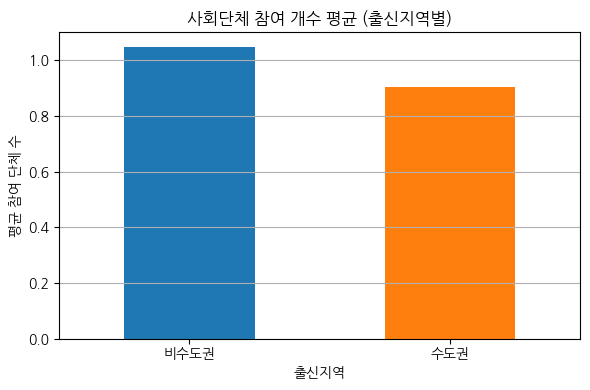

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

# 수도권/비수도권 구분
capital_area = ['서울특별시', '경기도', '인천광역시']
df['출신지역권역'] = df['출생지 다른 시도_LABEL'].apply(
    lambda x: '수도권' if x in capital_area else ('비수도권' if pd.notna(x) else '기타'))

# 분석 대상 컬럼: 사회활동 관련
social_cols = [col for col in df.columns if col.startswith("사회활동_") and col.endswith("참여및활동여부")]

# 참여 단체 수 계산 (값이 1이면 참여)
df['사회참여_개수'] = df[social_cols].fillna(0).astype(int).sum(axis=1)

# 수도권/비수도권만 대상으로 추림
df = df[df['출신지역권역'].isin(['수도권', '비수도권'])]

# 그룹별 평균 참여 개수
participation_by_region = df.groupby('출신지역권역')['사회참여_개수'].mean()

# 시각화
plt.figure(figsize=(6, 4))
participation_by_region.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title("사회단체 참여 개수 평균 (출신지역별)")
plt.ylabel("평균 참여 단체 수")
plt.xlabel("출신지역")
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [ ]:
# 메모리 절약을 위해 필요한 컬럼만 선택
social_participation_cols = [
    '사회활동_사회분야단체_참여및활동여부',
    '사회활동_경제분야단체_참여및활동여부',
    '사회활동_문화분야단체_참여및활동여부',
    '사회활동_정치분야단체_참여및활동여부',
    '사회활동_종교분야단체_참여및활동여부',
    '사회활동_지역단체_참여및활동여부',
    '사회활동_친목단체_참여및활동여부',
    '사회활동_교육단체_참여및활동여부',
    '사회활동_기타_참여및활동여부'
]

# 사용할 컬럼만 필터링
subset_cols = ['만연령', '직업대분류_LABEL', '출신지역권역'] + social_participation_cols
df_small = df[subset_cols].copy()
df_small = df_small[df_small['출신지역권역'].isin(['수도권', '비수도권'])]

# 연령대 구간 정의
def age_group(age):
    if pd.isna(age): return '미상'
    elif age < 20: return '10대 이하'
    elif age < 30: return '20대'
    elif age < 40: return '30대'
    elif age < 50: return '40대'
    elif age < 60: return '50대'
    elif age < 70: return '60대'
    else: return '70대 이상'
df_small['연령대'] = df_small['만연령'].apply(age_group)

# 각 활동 유형별 참여 비율 계산 함수
def calc_participation(df, group_cols):
    participation = {}
    for col in social_participation_cols:
        temp = df.groupby(group_cols)[col].apply(lambda x: (x == 1).sum() / len(x) * 100)
        participation[col.replace('사회활동_', '').replace('_참여및활동여부', '')] = temp
    return pd.DataFrame(participation).round(1)

# ① 연령대 × 출신지역권역 기준
age_region_participation = calc_participation(df_small, ['출신지역권역', '연령대'])

# ② 직업 × 출신지역권역 기준
job_region_participation = calc_participation(df_small, ['출신지역권역', '직업대분류_LABEL'])

age_region_participation



사회분야단체  경제분야단체  문화분야단체  정치분야단체  종교분야단체  지역단체  친목단체  교육단체   기타
출신지역권역 연령대                                                                  
비수도권   10대 이하     0.0     0.0     0.0     0.0     0.0   0.0   0.0   0.0  0.0
       20대        4.0     0.9    11.1     0.2     4.3   0.6   6.6   0.4  0.0
       30대        4.0     2.0    13.9     0.8     5.0   1.3   9.3   2.0  0.0
       40대        5.1     2.6    12.8     1.6     8.1   2.2   8.9   4.7  0.0
       50대        4.8     1.6    10.1     2.0    10.4   2.2  15.7   2.4  0.0
       60대        3.4     0.9     9.1     0.7    12.0   1.5  15.4   1.1  0.0
       70대 이상     1.3     0.9     3.5     0.2     9.9   1.8  10.2   0.4  0.0
수도권    10대 이하     0.0     0.0     0.0     0.0     0.0   0.0   0.0   0.0  0.0
       20대        5.6     1.7    13.3     0.2     6.9   1.1   7.4   0.7  0.0
       30대        4.3     1.7    13.1     1.7     5.8   1.7   7.9   1.8  0.0
       40대        3.8     3.8    11.3     1.9     8.8   2.1  10.9   4.4  0.0
       50대        4.0     4.3     7.0     0.9     9.5   3.4  11.0   2.7  0.0
       60대        2.4     2.4     6.0     0.6    10.8   1.8  16.9   0.6  0.0
       70대 이상     0.9     0.9     4.6     0.0    11.0   0.9  11.0   0.0  0.0

In [ ]:
job_region_participation

사회분야단체  경제분야단체  문화분야단체  정치분야단체  종교분야단체  지역단체  친목단체  \
출신지역권역 직업대분류_LABEL                                                            
비수도권   관리자                  5.3     2.6    13.2     2.6     7.9   0.0  18.4   
       기능원 및 관련 기능 종사자      4.2     1.7    10.0     0.8     5.0   2.1  13.8   
       기타                   2.8     0.6     6.8     0.5     6.9   1.3   7.2   
       농림어업 숙련 종사자         33.3     0.0    66.7     0.0     0.0   0.0  33.3   
       단순노무 종사자             4.2     1.6     7.5     1.3     6.8   1.6   5.8   
       사무 종사자               4.6     2.0    13.2     1.1     5.6   1.3  12.4   
       서비스 종사자              4.6     1.2    10.2     1.4     7.0   1.8   8.7   
       장치기계 조작 및 조립 종사자     5.1     4.5    11.5     2.6     5.1   1.9  14.7   
       전문가 및 관련 종사자         4.5     2.1    15.0     0.6     8.1   1.2  11.0   
       판매 종사자               3.7     1.0    11.7     0.8     8.0   1.6  10.5   
수도권    관리자                  6.2     6.2    43.8     0.0    18.8   6.2   0.0   
       기능원 및 관련 기능 종사자      1.5     2.9     5.9     0.7     5.1   1.5  10.3   
       기타                   2.2     0.9     4.3     0.1     4.6   0.8   5.0   
       농림어업 숙련 종사자          0.0     0.0     0.0    33.3     0.0   0.0   0.0   
       단순노무 종사자             5.0     4.3     8.6     2.2     7.2   3.6   7.2   
       사무 종사자               5.7     2.7    13.4     1.3     7.4   1.6   7.8   
       서비스 종사자              2.9     1.6    12.1     0.6     5.1   2.2   7.6   
       장치기계 조작 및 조립 종사자    11.4     5.1     5.1     0.0     6.3   3.8  12.7   
       전문가 및 관련 종사자         4.8     1.7    16.2     0.9     7.6   0.7  10.9   
       판매 종사자               3.0     2.0    11.1     2.7     7.1   3.4   7.7   

                         교육단체   기타  
출신지역권역 직업대분류_LABEL                  
비수도권   관리자                2.6  0.0  
       기능원 및 관련 기능 종사자    1.3  0.0  
       기타                 1.1  0.0  
       농림어업 숙련 종사자        0.0  0.0  
       단순노무 종사자           1.3  0.0  
       사무 종사자             1.9  0.0  
       서비스 종사자            1.6  0.0  
       장치기계 조작 및 조립 종사자   1.9  0.0  
       전문가 및 관련 종사자       2.7  0.1  
       판매 종사자             1.4  0.0  
수도권    관리자                6.2  0.0  
       기능원 및 관련 기능 종사자    2.2  0.0  
       기타                 0.9  0.0  
       농림어업 숙련 종사자        0.0  0.0  
       단순노무 종사자           0.0  0.0  
       사무 종사자             1.8  0.0  
       서비스 종사자            2.2  0.0  
       장치기계 조작 및 조립 종사자   1.3  0.0  
       전문가 및 관련 종사자       1.7  0.0  
       판매 종사자             1.7  0.0

In [ ]:
# 메모리 문제 예방을 위해 필요한 컬럼만 추출
commute_cols = [
    '통근통학여부_LABEL',
    '통근통학장소_LABEL',
    '통근통학_소요분수',
    '출신지역권역',
    '만연령',
    '직업대분류_LABEL',
    '교통수단_도보여부',
    '교통수단_자전거_이용여부',
    '교통수단_승용차및소형승합차_이용여부',
    '교통수단_트럭_이용여부',
    '교통수단_시내좌석마을버스_이용여부',
    '교통수단_통근통학버스이용_이용여부',
    '교통수단_고속시외버스_이용여부',
    '교통수단_전철지하철_이용여부',
    '교통수단_기차_이용여부',
    '교통수단_택시_이용여부',
    '교통수단_기타_이용여부'
]

df_commute = df[commute_cols].copy()
df_commute = df_commute[df_commute['출신지역권역'].isin(['수도권', '비수도권'])]

# 연령대 범주 생성
def age_group(age):
    if pd.isna(age): return '미상'
    elif age < 20: return '10대 이하'
    elif age < 30: return '20대'
    elif age < 40: return '30대'
    elif age < 50: return '40대'
    elif age < 60: return '50대'
    elif age < 70: return '60대'
    else: return '70대 이상'
df_commute['연령대'] = df_commute['만연령'].apply(age_group)

# 1. 평균 출퇴근 소요시간
avg_commute_time = df_commute[df_commute['통근통학여부_LABEL'] == '통근'].groupby('출신지역권역')['통근통학_소요분수'].mean().round(1)

# 2. 출근 교통수단 사용률
transport_cols = [col for col in commute_cols if col.startswith('교통수단_')]
transport_usage = df_commute[df_commute['통근통학여부_LABEL'] == '통근'].copy()

transport_summary = {}
for region in ['수도권', '비수도권']:
    sub = transport_usage[transport_usage['출신지역권역'] == region]
    result = {}
    for col in transport_cols:
        result[col.replace("교통수단_", "").replace("_이용여부", "")] = sub[col].fillna(0).astype(int).mean() * 100
    transport_summary[region] = pd.Series(result).round(1)

transport_df = pd.concat(transport_summary, axis=1)
transport_df.columns = ['수도권', '비수도권']
transport_df = transport_df.sort_values("비수도권", ascending=False)

print("✅ 수도권 vs 비수도권 평균 출퇴근 시간 (분)")
print(avg_commute_time)

print("\n✅ 수도권 vs 비수도권 교통수단 사용률 (%)")
print(transport_df)


✅ 수도권 vs 비수도권 평균 출퇴근 시간 (분)
Series([], Name: 통근통학_소요분수, dtype: float64)

✅ 수도권 vs 비수도권 교통수단 사용률 (%)
           수도권  비수도권
도보여부       NaN   NaN
자전거        NaN   NaN
승용차및소형승합차  NaN   NaN
트럭         NaN   NaN
시내좌석마을버스   NaN   NaN
통근통학버스이용   NaN   NaN
고속시외버스     NaN   NaN
전철지하철      NaN   NaN
기차         NaN   NaN
택시         NaN   NaN
기타         NaN   NaN


In [ ]:
# 교통수단 관련 컬럼 재정의 (공란 → 0, 1만 유지)
transport_cols_clean = [
    '교통수단_도보여부', '교통수단_자전거_이용여부', '교통수단_승용차및소형승합차_이용여부',
    '교통수단_트럭_이용여부', '교통수단_시내좌석마을버스_이용여부', '교통수단_통근통학버스이용_이용여부',
    '교통수단_고속시외버스_이용여부', '교통수단_전철지하철_이용여부', '교통수단_기차_이용여부',
    '교통수단_택시_이용여부', '교통수단_기타_이용여부'
]

# 원본에서 복사 후 공란은 0으로 채우고 int 변환
df_clean = df[['출신지역권역'] + transport_cols_clean].copy()
df_clean = df_clean[df_clean['출신지역권역'].isin(['수도권', '비수도권'])]
df_clean[transport_cols_clean] = df_clean[transport_cols_clean].fillna(0).astype(int)

# 출신지역권역 기준 평균 비율 계산
transport_usage_cleaned = df_clean.groupby('출신지역권역')[transport_cols_clean].mean().T * 100

# 보기 좋게 이름 정리
transport_usage_cleaned.index = transport_usage_cleaned.index.str.replace('교통수단_', '').str.replace('_이용여부', '')
transport_usage_cleaned = transport_usage_cleaned.round(1).sort_values('비수도권', ascending=False)

transport_usage_cleaned


출신지역권역,비수도권,수도권
전철지하철,27.7,27.2
시내좌석마을버스,15.2,16.3
승용차및소형승합차,14.9,14.4
도보여부,12.9,13.2
자전거,1.6,1.4
통근통학버스이용,1.6,1.9
기타,0.8,0.9
택시,0.7,0.7
고속시외버스,0.5,0.4
트럭,0.3,0.3


In [ ]:
# 유효한 통근자만 필터링
valid_commute = df[
    (df['출신지역권역'].isin(['수도권', '비수도권'])) &
    (df['통근통학여부_LABEL'] == '통근함') &
    (df['통근통학_소요분수'] > 0)
]

# 출신지역권역별 평균 통근 시간 계산
avg_commute_time_cleaned = valid_commute.groupby('출신지역권역')['통근통학_소요분수'].mean().round(1)

print("✅ 출신지역권역별 평균 통근 시간 (분)\n")
print(avg_commute_time_cleaned)


✅ 출신지역권역별 평균 통근 시간 (분)

출신지역권역
비수도권    37.7
수도권     37.9
Name: 통근통학_소요분수, dtype: float64


In [ ]:
# 아동 보육 관련 컬럼 정리
care_columns = [
    '아동보육_부모_돌봄주체여부',
    '아동보육_조부모_돌봄주체여부',
    '아동보육_기타가족및친인척_돌봄주체여부',
    '아동보육_가사도우미및이웃사람_돌봄주체여부',
    '아동보육_혼자및아동끼리지냄_돌봄주체여부',
    '아동보육_어린이집및놀이방_돌봄주체여부',
    '아동보육_유치원_돌봄주체여부',
    '아동보육_지역아동센터_돌봄주체여부',
    '아동보육_방과후학교_돌봄주체여부',
    '아동보육_학원_돌봄주체여부',
    '아동보육_기타_돌봄주체여부'
]

# 아동이 있는 가구 필터링 (자녀로 표시된 사람만 필터)
child_care_df = df[df['출신지역권역'].isin(['수도권', '비수도권'])].copy()

# 각 보육 방식별로 응답 비율 계산
care_result = {}
for col in care_columns:
    care_result[col] = child_care_df.groupby('출신지역권역')[col].apply(lambda x: (x == 1).sum() / len(x) * 100)

# 결과 DataFrame으로 변환 및 컬럼명 정제
care_result_df = pd.DataFrame(care_result).T
care_result_df.columns = ['수도권', '비수도권']
care_result_df.index = [col.replace('아동보육_', '').replace('_돌봄주체여부', '') for col in care_result_df.index]
care_result_df = care_result_df.round(1)

care_result_df

,수도권,비수도권
부모,0.9,6.5
조부모,0.2,1.4
기타가족및친인척,0.0,0.2
가사도우미및이웃사람,0.0,0.4
혼자및아동끼리지냄,0.0,0.4
어린이집및놀이방,0.1,2.2
유치원,0.1,1.0
지역아동센터,0.0,0.1
방과후학교,0.0,0.4
학원,0.2,0.7
